In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
encoding_dim = 32
# This is our input image
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [4]:
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test),
verbose=1)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.4172 - val_loss: 0.3416
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3264 - val_loss: 0.3194
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3118 - val_loss: 0.3093
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3026 - val_loss: 0.3007
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2956 - val_loss: 0.2954
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2916 - val_loss: 0.2924
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2892 - val_loss: 0.2908
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2878 - val_loss: 0.2893
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2868 - val_loss: 0.2885
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2860 - val_loss: 0.2880

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 780us/step


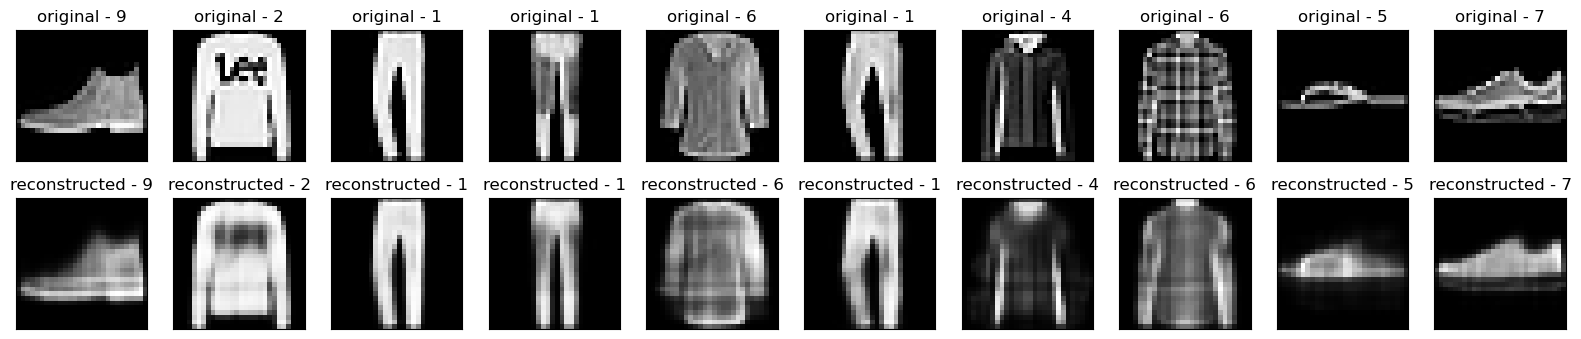

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
# Display original
  ax = plt.subplot(2, n, i + 1)
  plt.title(f"original - {y_test[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.title(f"reconstructed - {y_test[i]}")
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



In [10]:
%load_ext watermark
%watermark -a "Navaneeth Sivakumar" -u -d -v -m

Author: Navaneeth Sivakumar

Last updated: 2024-03-29

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.18.1

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

